<a href="https://colab.research.google.com/github/HS587885/DigitalAnalytics_intermediateProgramming/blob/main/Week13(%ED%8C%90%EB%8B%A4%EC%8A%A42)_%EC%84%B1%ED%98%95%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 결측데이터 생성

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=np.random.randn(5,3)
data
df=pd.DataFrame(data,columns=['C1','C2','C3'])
df

,C1,C2,C3
0,0.107547,0.938547,1.869629
1,0.267794,2.429297,2.059953
2,0.238812,0.152041,-0.371465
3,-0.875506,0.677567,0.168474
4,1.222866,-0.850742,0.173682


## 결측 데이터를 특정 값으로 채우기

In [ ]:
df.loc[2, ['C2']] = np.nan #null
df.loc[3, ['C2']] = np.nan 


In [ ]:
#value
df.fillna(0)

,C1,C2,C3
0,0.107547,0.938547,1.869629
1,0.267794,2.429297,2.059953
2,0.238812,0.000000,-0.371465
3,-0.875506,0.000000,0.168474
4,1.222866,-0.850742,0.173682


## 결측 데이터를 평균으로 채우기

In [ ]:
df.mean()
df3 = df.fillna(df.mean())
df3

,C1,C2,C3
0,0.107547,0.938547,1.869629
1,0.267794,2.429297,2.059953
2,0.238812,0.839034,-0.371465
3,-0.875506,0.839034,0.168474
4,1.222866,-0.850742,0.173682


In [ ]:
df

,C1,C2,C3
0,0.107547,0.938547,1.869629
1,0.267794,2.429297,2.059953
2,0.238812,NaN,-0.371465
3,-0.875506,NaN,0.168474
4,1.222866,-0.850742,0.173682


## 최빈값으로 채우기

In [ ]:
# 결측데이터 생성
area=['서울','강원','경기','인천','서울']
df=pd.DataFrame({'지역':area})
df.loc[1] = np.nan
df.loc[3] = np.nan
df

,지역
0,서울
1,NaN
2,경기
3,NaN
4,서울


In [ ]:
# 결측 데이터를 최빈값으로 채우기
# mode()
df['지역'].mode()
df = df.fillna(df['지역'].mode()[0])
df

,지역
0,서울
1,서울
2,경기
3,서울
4,서울


## 결측 데이터 처리 예
- [준비파일] : bank.csv

In [ ]:
# 결측 데이터 확인
import pandas as pd

bank = pd.read_csv('/content/drive/MyDrive/data/bank.csv')
bank


,job,education,balance,duration,y
0,management,tertiary,2143,261,no
1,technician,secondary,265,348,no
2,blue-collar,secondary,-7,365,no
3,technician,secondary,-3,1666,no
4,technician,secondary,-103,145,no
...,...,...,...,...,...
7229,services,secondary,199,173,no
7230,self-employed,tertiary,159,449,yes
7231,management,tertiary,138,162,no
7232,management,tertiary,1428,333,no


In [ ]:
bank.isnull()

,job,education,balance,duration,y
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7229,False,False,False,False,False
7230,False,False,False,False,False
7231,False,False,False,False,False
7232,False,False,False,False,False


In [ ]:
bank.notnull()

,job,education,balance,duration,y
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
7229,True,True,True,True,True
7230,True,True,True,True,True
7231,True,True,True,True,True
7232,True,True,True,True,True


In [ ]:
bank.isnull().sum() ###

job           44
education    273
balance        0
duration       0
y              0
dtype: int64

In [ ]:
# 결측 데이터 행 삭제 후 확인
bank2 = bank.dropna()
bank2.isnull().sum() ###

job          0
education    0
balance      0
duration     0
y            0
dtype: int64

In [ ]:
bank.isnull().sum() 

job           44
education    273
balance        0
duration       0
y              0
dtype: int64

In [ ]:
# 결측 데이터 최빈값으로 대체
m = bank['job'].mode()[0]
bank['job'].fillna(m, inplace = True)
bank.isnull().sum() 

job            0
education    273
balance        0
duration       0
y              0
dtype: int64

# 데이터 가공 및 그룹핑

## 엑셀 불러오기
- [준비파일] : weather2020-2021.xlsx

In [ ]:
import pandas as pd
filename = '/content/drive/MyDrive/data/weather2020-2021.xlsx'
weather = pd.read_excel(filename)
weather.head()

,날짜,평균기온,최저기온,최고기온
0,2020-01-01,-2.2,-6.5,0.3
1,2020-01-02,1.0,-0.7,3.8
2,2020-01-03,-0.1,-3.4,4.6
3,2020-01-04,1.2,-2.8,6.1
4,2020-01-05,1.3,-3.2,6.6


## 컬럼생성

In [ ]:
weather['city'] = '서울'
weather.head()

,날짜,평균기온,최저기온,최고기온,city
0,2020-01-01,-2.2,-6.5,0.3,서울
1,2020-01-02,1.0,-0.7,3.8,서울
2,2020-01-03,-0.1,-3.4,4.6,서울
3,2020-01-04,1.2,-2.8,6.1,서울
4,2020-01-05,1.3,-3.2,6.6,서울


## 컬럼 삭제 및 이름변경

In [ ]:
# 평균기온컬럼을 삭제
weather.drop(['평균기온'], axis = 1, inplace = True)



In [ ]:
weather

,날짜,최저기온,최고기온,city
0,2020-01-01,-6.5,0.3,서울
1,2020-01-02,-0.7,3.8,서울
2,2020-01-03,-3.4,4.6,서울
3,2020-01-04,-2.8,6.1,서울
4,2020-01-05,-3.2,6.6,서울
...,...,...,...,...
726,2021-12-27,-12.9,-3.9,서울
727,2021-12-28,-8.5,-0.9,서울
728,2021-12-29,-3.8,5.9,서울
729,2021-12-30,-6.8,0.2,서울


## 컬럼 이름 변경

In [ ]:
weather.rename(columns={'city': '지역'}, inplace = True)
weather

,날짜,최저기온,최고기온,지역
0,2020-01-01,-6.5,0.3,서울
1,2020-01-02,-0.7,3.8,서울
2,2020-01-03,-3.4,4.6,서울
3,2020-01-04,-2.8,6.1,서울
4,2020-01-05,-3.2,6.6,서울
...,...,...,...,...
726,2021-12-27,-12.9,-3.9,서울
727,2021-12-28,-8.5,-0.9,서울
728,2021-12-29,-3.8,5.9,서울
729,2021-12-30,-6.8,0.2,서울


## 날짜형식 데이터 추출

In [ ]:
# 데이터타입 조회
weather.dtypes

날짜      datetime64[ns]
최저기온           float64
최고기온           float64
지역              object
dtype: object

In [ ]:
weather['년도'] = weather['날짜'].dt.year
weather['월'] = weather['날짜'].dt.month
weather['일'] = weather['날짜'].dt.day

weather

,날짜,최저기온,최고기온,지역,년도,월,일
0,2020-01-01,-6.5,0.3,서울,2020,1,1
1,2020-01-02,-0.7,3.8,서울,2020,1,2
2,2020-01-03,-3.4,4.6,서울,2020,1,3
3,2020-01-04,-2.8,6.1,서울,2020,1,4
4,2020-01-05,-3.2,6.6,서울,2020,1,5
...,...,...,...,...,...,...,...
726,2021-12-27,-12.9,-3.9,서울,2021,12,27
727,2021-12-28,-8.5,-0.9,서울,2021,12,28
728,2021-12-29,-3.8,5.9,서울,2021,12,29
729,2021-12-30,-6.8,0.2,서울,2021,12,30


In [ ]:
#weather.pivot_table(index=["월"], columns= ["최저기온", "최고기온"],aggfunc=np.mean,  fill_value=0)

In [ ]:
weather.groupby('월')[["최저기온","최고기온" ]].mean()

,최저기온,최고기온
월,,
1,-4.241935,4.061290
2,-1.731579,7.535088
3,3.401613,14.037097
4,7.880000,18.041667
5,13.232258,22.604839
6,19.386667,28.256667
7,22.875806,30.083871
8,23.593548,29.511290
9,18.386667,26.248333


In [ ]:
# 응용문제 : 월별 최저기온, 최고기온 평균 출력
weather.groupby('월')[["최저기온","최고기온" ]].mean()

,최저기온,최고기온
월,,
1,-4.241935,4.061290
2,-1.731579,7.535088
3,3.401613,14.037097
4,7.880000,18.041667
5,13.232258,22.604839
6,19.386667,28.256667
7,22.875806,30.083871
8,23.593548,29.511290
9,18.386667,26.248333


## 데이터 병합
- [준비파일] : nation.xslx, code.xslx
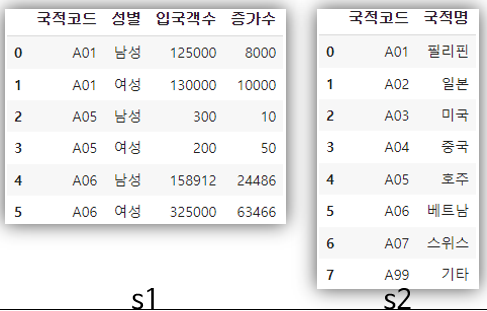

In [ ]:
s1 = pd.read_excel('/content/drive/MyDrive/data/nation.xlsx')
s2 = pd.read_excel('/content/drive/MyDrive/data/code.xlsx')
s2

,국적코드,국적명
0,A01,필리핀
1,A02,일본
2,A03,미국
3,A04,중국
4,A05,호주
5,A06,베트남
6,A07,스위스
7,A99,기타


In [ ]:
# 공통컬럼을 기준으로 데이터 병합
nation = pd.merge(s1, s2, on = '국적코드')
nation

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000,8000,필리핀
1,A01,여성,130000,10000,필리핀
2,A05,남성,300,10,호주
3,A05,여성,200,50,호주
4,A06,남성,158912,24486,베트남
5,A06,여성,325000,63466,베트남


In [ ]:
# left 기준
pd.merge(s1, s2, how = 'left', on = '국적코드')

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000,8000,필리핀
1,A01,여성,130000,10000,필리핀
2,A05,남성,300,10,호주
3,A05,여성,200,50,호주
4,A06,남성,158912,24486,베트남
5,A06,여성,325000,63466,베트남


In [ ]:
# right 기준
pd.merge(s1, s2, how = 'right', on = '국적코드')

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000.0,8000.0,필리핀
1,A01,여성,130000.0,10000.0,필리핀
2,A02,NaN,NaN,NaN,일본
3,A03,NaN,NaN,NaN,미국
4,A04,NaN,NaN,NaN,중국
5,A05,남성,300.0,10.0,호주
6,A05,여성,200.0,50.0,호주
7,A06,남성,158912.0,24486.0,베트남
8,A06,여성,325000.0,63466.0,베트남
9,A07,NaN,NaN,NaN,스위스


In [ ]:
# 컬럼명이 다를 경우
pd.merge(s1, s2, left_on = '국적코드', right_on = '국적코드')

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000,8000,필리핀
1,A01,여성,130000,10000,필리핀
2,A05,남성,300,10,호주
3,A05,여성,200,50,호주
4,A06,남성,158912,24486,베트남
5,A06,여성,325000,63466,베트남


In [ ]:
# 데이터 저장하기
# 파일경로
import pandas as pd
filename = '/content/drive/MyDrive/data/sample1.xlsx'
nation.to_excel(filename)

In [ ]:
# 데이터 저장하기
import pandas as pd
filename = '/content/drive/MyDrive/data/sample2.xlsx'
nation.to_excel(filename, index=False)

## 데이터 그룹핑

In [ ]:
# 한 컬럼 기준 그룹화
s1.groupby('국적코드').sum()


,입국객수,증가수
국적코드,,
A01,255000,18000
A05,500,60
A06,483912,87952


In [ ]:
# 여러 컬럼 기준 그룹화
s1.groupby(['국적코드','성별']).sum()


입국객수    증가수
국적코드 성별               
A01  남성  125000   8000
     여성  130000  10000
A05  남성     300     10
     여성     200     50
A06  남성  158912  24486
     여성  325000  63466

# 실습문제
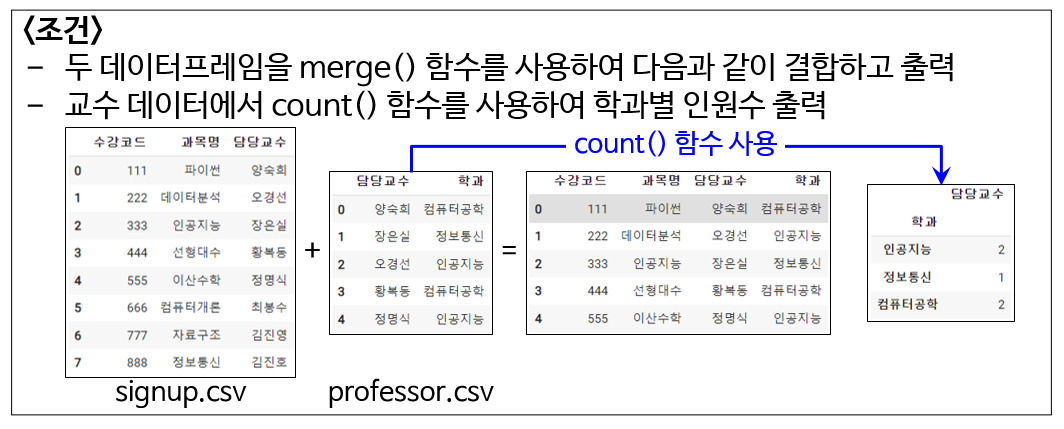

In [ ]:
sign = pd.read_csv('/content/drive/MyDrive/data/signup.csv', encoding= 'euc-kr')
professor = pd.read_csv('/content/drive/MyDrive/data/professor.csv', encoding= 'euc-kr')
sign.head(8)

,수강코드,과목명,담당교수
0,111,파이썬,양숙희
1,222,데이터분석,오경선
2,333,인공지능,장은실
3,444,선형대수,황복동
4,555,이산수학,정명식
5,666,컴퓨터개론,최봉수
6,777,자료구조,김진영
7,888,정보통신,김진호


In [ ]:
professor.head()

,담당교수,학과
0,양숙희,컴퓨터공학
1,장은실,정보통신
2,오경선,인공지능
3,황복동,컴퓨터공학
4,정명식,인공지능


In [ ]:
# 데이터 병합
df = pd.merge(sign, professor, on = '담당교수')
df.head()

,수강코드,과목명,담당교수,학과
0,111,파이썬,양숙희,컴퓨터공학
1,222,데이터분석,오경선,인공지능
2,333,인공지능,장은실,정보통신
3,444,선형대수,황복동,컴퓨터공학
4,555,이산수학,정명식,인공지능


In [ ]:
df1 = df.groupby("학과")[['담당교수']].count()
df1

,담당교수
학과,
인공지능,2
정보통신,1
컴퓨터공학,2


# 응용문제1

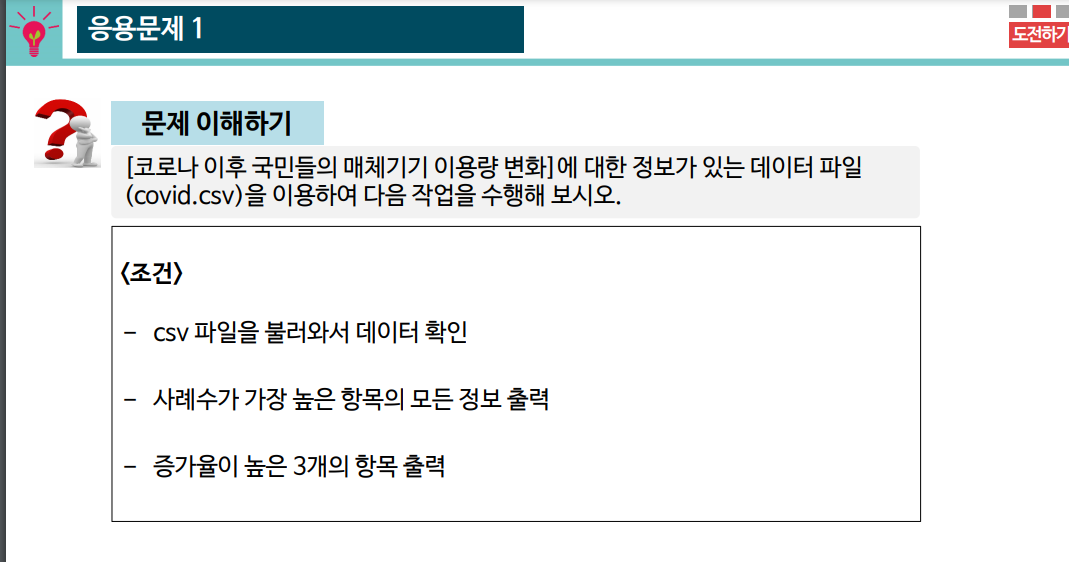

In [ ]:
import pandas as pd

filename = "/content/drive/MyDrive/data/covid.csv"
covid = pd.read_csv(filename,index_col='항목', encoding = 'cp949')
covid

FileNotFoundError: ignored

In [ ]:
# 사례수가 가장 높은 항목의 모든 정보 출력
c= covid.sort_values(by='사례수', ascending = False)
c.head(1)

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4


In [ ]:
# 증가율이 높은 3개의 항목 출력
c= covid.sort_values(by='증가', ascending = False)
c.head(3)

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4
1,텔레비전,965,68.5,3.9,27.6
2,개인용 PC,973,65.7,3.7,30.6


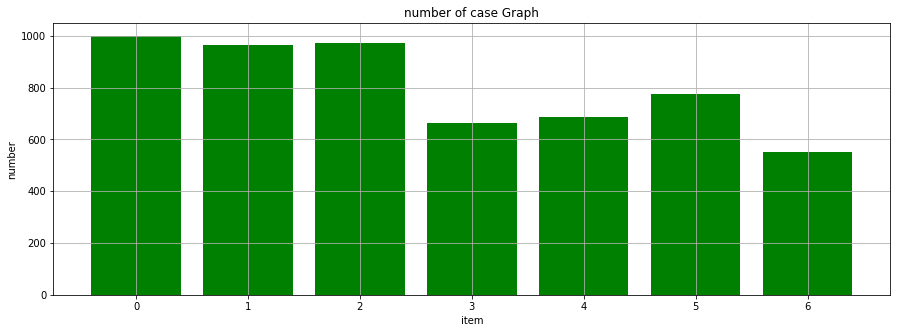

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5)) # 그래프크기
plt.title('number of case Graph')
case = c['사례수']
plt.bar(case.index, case, color= 'g') #막대그래프
plt.xlabel('item') # X축 제목 
plt.ylabel('number') # Y축 제목 
plt.grid()
plt.show()

# 응용문제 2

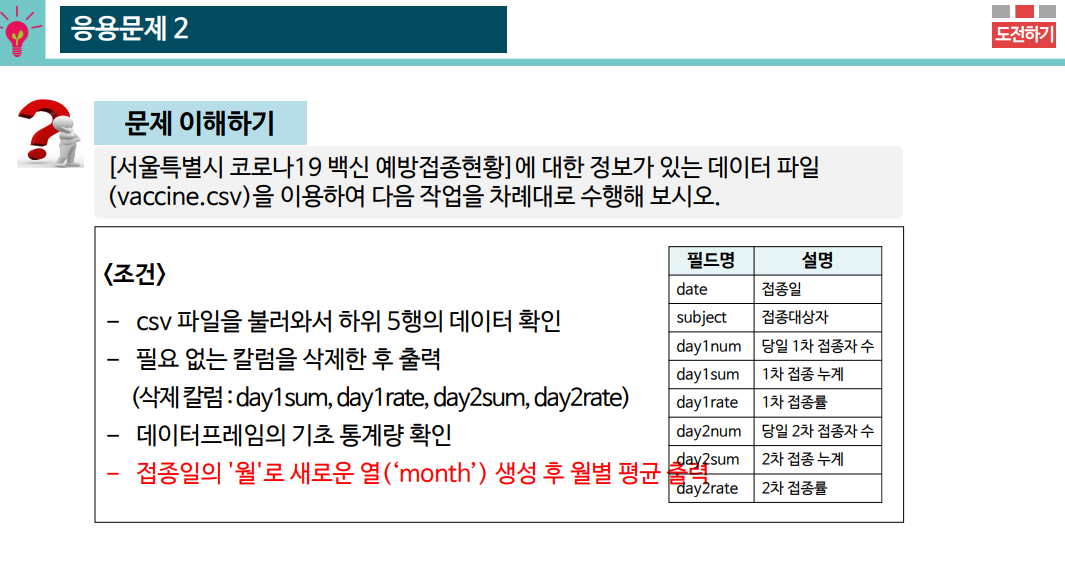

In [ ]:
# csv파일 불러오기 및 하위 5행의 데이터 확인
import pandas as pd

filename = "/content/drive/MyDrive/data/vaccine.csv"
vaccine = pd.read_csv(filename, encoding = 'cp949')
vaccine.tail()

,date,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
174,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
175,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
176,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
177,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6
178,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3


In [ ]:
vaccine.columns

Index(['date', 'subject', 'day1num', 'month'], dtype='object')

In [ ]:
#필요없는 컬럼 삭제 후 출력 
del_lst = ["day1sum",	"day1rate",	"day2sum",	"day2sum",	"day2rate"]
for i in del_lst:
  vaccine.drop([i], axis = 1, inplace = True)
vaccine.head()

,date,subject,day1num
0,2021.10.16,9505868,10673
1,2021.10.15,9505868,14556
2,2021.10.14,9505868,9609
3,2021.10.13,9505868,9804
4,2021.10.12,9505868,17274


In [ ]:
# 데이터프레임 기초통계량 확인

vaccine.describe()

,subject,day1num
count,1.790000e+02,179.000000
mean,5.086644e+06,40078.150838
std,3.324235e+06,44231.469656
min,1.019322e+06,0.000000
25%,2.279241e+06,4385.000000
50%,3.943320e+06,23323.000000
75%,9.505868e+06,71634.500000
max,9.795426e+06,169036.000000


In [ ]:
v = vaccine
v.dtypes

date       object
subject     int64
day1num     int64
dtype: object

In [ ]:
v['date'] = pd.to_datetime(v['date'], format='%Y.%m.%d') 

In [ ]:
v['month'] =  v['date'].dt.month
v

,date,subject,day1num,month
0,2021-10-16,9505868,10673,10
1,2021-10-15,9505868,14556,10
2,2021-10-14,9505868,9609,10
3,2021-10-13,9505868,9804,10
4,2021-10-12,9505868,17274,10
...,...,...,...,...
174,2021-04-25,1023346,23323,4
175,2021-04-24,1023346,200,4
176,2021-04-23,1027740,10195,4
177,2021-04-22,1023538,27074,4


In [ ]:
# 접종일의 '월'로 새로운 열 'month' 생성후 월별 평균 출력

v.groupby('month')[['subject', 'day1num']].mean()

,subject,day1num
month,,
4,1.054686e+06,22060.100000
5,1.289918e+06,18225.548387
6,3.167106e+06,55957.200000
7,3.819340e+06,25807.870968
8,6.702049e+06,57667.258065
9,9.556825e+06,65715.000000
10,9.505868e+06,9406.312500
